<a href="https://colab.research.google.com/github/2303A51202/ADM-LAB/blob/main/ADM_LAB_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
np.random.seed(42)
data = np.random.normal(0, 1, 100)
outliers=np.random.uniform(5,10,15)
data_with_outliers = np.concatenate([data, outliers])

In [ ]:
df = pd.DataFrame(data_with_outliers, columns=['Value'])

In [ ]:
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
outliers_iqr = df[(df['Value'] < lower_bound) | (df['Value'] > upper_bound)]

In [ ]:
z_scores = stats.zscore(df['Value'])
outliers_zscore = df[np.abs(z_scores) > 3]

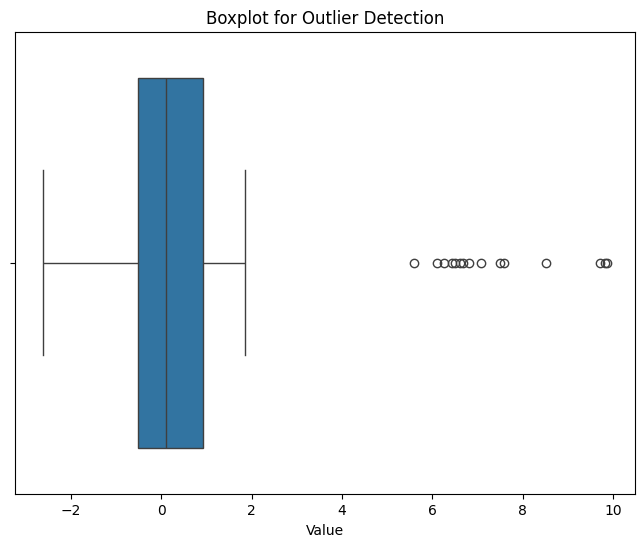

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Value'])
plt.title("Boxplot for Outlier Detection")
plt.show()

In [ ]:
df_capped = df.copy()
df_capped['Value'] = np.clip(df_capped['Value'], lower_bound, upper_bound)

In [ ]:
df_removed = df.copy()
df_removed = df_removed[(df_removed['Value'] >= lower_bound) & (df_removed['Value'] <= upper_bound)]

In [ ]:
df_imputed = df.copy()
median_value = df['Value'].median()
df_imputed['Value'] = np.where((df_imputed['Value'] < lower_bound) | (df_imputed['Value'] > upper_bound), median_value, df_imputed['Value'])

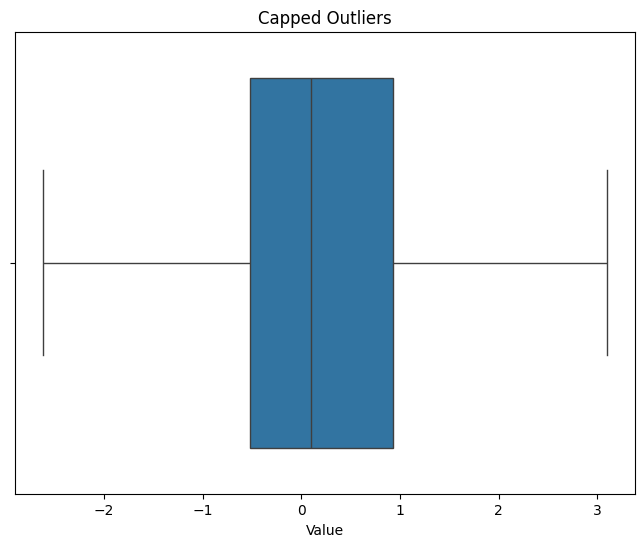

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_capped['Value'])
plt.title("Capped Outliers")
plt.show()

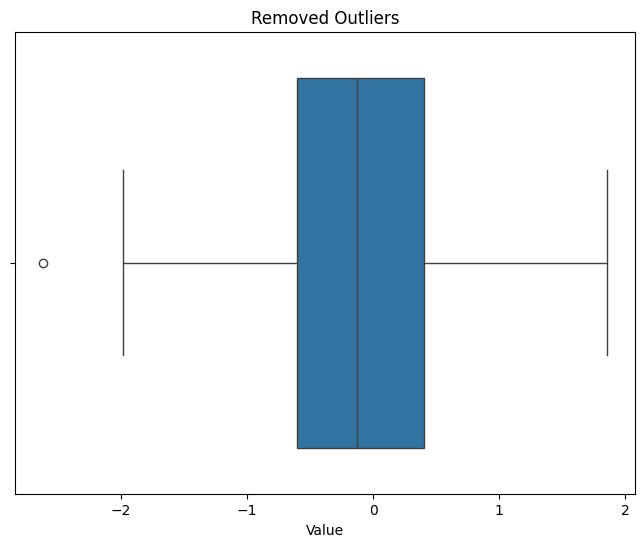

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_removed['Value'])
plt.title("Removed Outliers")
plt.show()

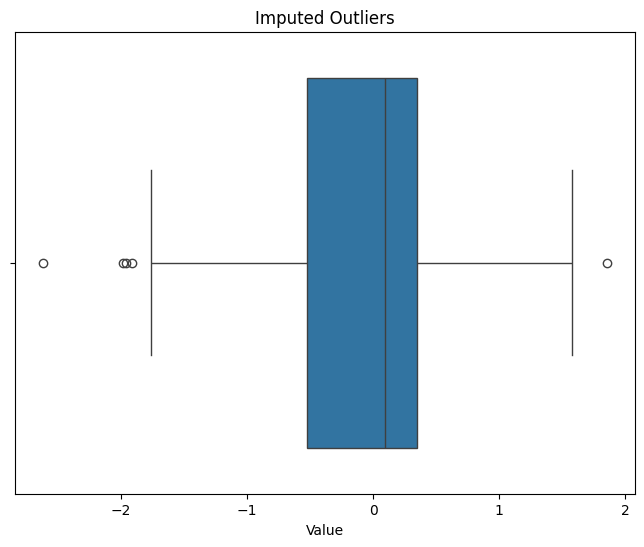

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_imputed['Value'])
plt.title("Imputed Outliers")
plt.show()

In [ ]:
print(f"Outliers detected using IQR:\n{outliers_iqr}")
print(f"Outliers detected using Z-Score:\n{outliers_zscore}")

Outliers detected using IQR:
        Value
100  7.087055
101  6.110539
102  5.599327
103  6.688076
104  9.714549
105  6.616015
106  7.593953
107  8.515095
108  6.818148
109  9.858910
110  9.812236
111  6.258911
112  7.486243
113  6.504392
114  6.424202
Outliers detected using Z-Score:
        Value
104  9.714549
109  9.858910
110  9.812236
